<a href="https://colab.research.google.com/github/Mike-Wilkins/Machine-Learning-Application/blob/master/CNN_Emotions_Pickle_Upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect GPU hardware accelerator and mount Google Drive

In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Import Libraries

In [0]:

#%tensorflow_version 1.x

import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D
from keras.layers.convolutional import *
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import cv2
import os
from keras.regularizers import l2
from keras import optimizers
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [0]:
print (tf.__version__)

1.15.0


# Import training, validation and test pickle files

In [0]:
train_images = pd.read_pickle("X_train.pickle")
train_labels = pd.read_pickle("y_train.pickle")

valid_images = pd.read_pickle("X_valid.pickle")
valid_labels = pd.read_pickle("y_valid.pickle")

test_images = pd.read_pickle("X_test.pickle")
test_labels = pd.read_pickle("y_test.pickle")

print("Number of images in Training set:", len(train_images))
print("Number of images in Valid set:", len(valid_images))
print("Number of images in Test set:", len(test_images))

Number of images in Training set: 2500
Number of images in Valid set: 900
Number of images in Test set: 1000


# One-hot encode labels
A one-hot encoding is a representation of categorical variables:

*   Happy:&emsp;[1,0,0,0,0]
*   Sad:&emsp;&emsp;&nbsp;[0,1,0,0,0]
*   Surprise: [0,0,1,0,0]
*   Anger:&emsp; [0,0,0,1,0]
*   Disgust: &nbsp;[0,0,0,0,1]



Original Label: 1
One Hot Encode[0. 1. 0. 0. 0.]


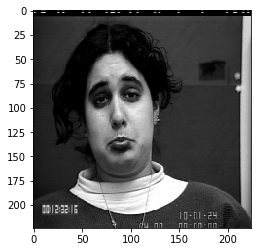

<Figure size 1440x1080 with 0 Axes>

In [0]:
classes = 5
train_labels = np.array([train_labels]).reshape(-1)
one_hot_train_labels = np.eye(classes)[train_labels]

valid_labels = np.array([valid_labels]).reshape(-1)
one_hot_valid_labels = np.eye(classes)[valid_labels]

test_labels = np.array([test_labels]).reshape(-1)
one_hot_test_labels = np.eye(classes)[test_labels]

#Demo output from one-hot-encoding
image_id = 500
print('Original Label: ' + str(train_labels[image_id]))
print('One Hot Encode'+ str(one_hot_train_labels[image_id]))
IMG_SIZE = 224
x = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE)
plt.imshow(x[image_id], cmap='gray')
plt.figure(figsize=(20,15))
plt.show()

# Apply data augmentaion to training images

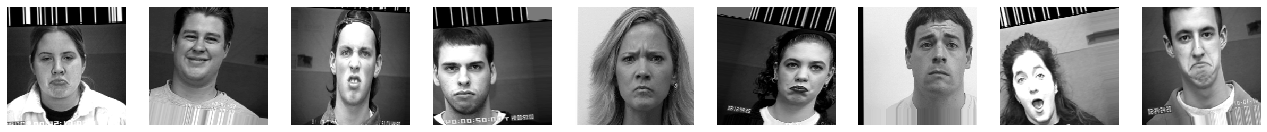

In [0]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


# Demonstrate effects of data augmentation

columns=10
plt.figure(figsize=(25,25))
x_train = train_images.astype('float32')

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, train_labels, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(5 / columns + 1, columns, i+1)
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    # show the plot
    plt.show()
    break


# Prepare and configure images for CNN implementation

In [0]:
train_batches = datagen.flow(
    train_images, 
    one_hot_train_labels, 
    shuffle=True, 
    batch_size=20)

valid_batches = ImageDataGenerator(rescale = 1./255).flow(
    valid_images,
    one_hot_valid_labels,
    shuffle=True, 
    batch_size=10)

test_batches = ImageDataGenerator(rescale = 1./255).flow(
    test_images,
    one_hot_test_labels,
    shuffle=False, 
    batch_size=20)

In [0]:
#for images in test_images[:10]:
  #im = np.squeeze(images)
  #plt.imshow(im,cmap='gray')
  #plt.show()

# Implement CNN model

In [0]:


model =  Sequential()

model.add( Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (224,224,1), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add( Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add( Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add( Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add( Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add( Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add( Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation ("relu"))
model.add(Dropout(0.2)) 

model.add(Dense(256))
model.add(Activation ("relu"))
model.add(Dropout(0.3)) 

model.add(Dense(128))
model.add(Activation ("relu"))
model.add(Dropout(0.5)) 

model.add(Dense(5))
model.add(Activation("softmax"))
  
model.compile(Adam(lr=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()



# 1.   Create early stopper and check point callbacks
# 2.   Train CNN model and define training epochs





In [0]:
epoch_steps = 100
val_steps = 50
steps = 50

In [0]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=45, mode='auto')
checkpoint_path = '/content/gdrive/My Drive/Colab Notebooks/weightsV2.hd5'
checkpointer = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)


history = model.fit_generator(train_batches,
                              steps_per_epoch=epoch_steps,
                              validation_data=valid_batches,
                              validation_steps=val_steps,
                              epochs=200,
                              callbacks=[checkpointer, early_stopper])

In [0]:
#print(history.history.keys())

# Create Matplotlib graphs for measuring output metrics

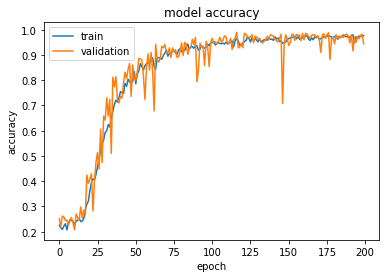

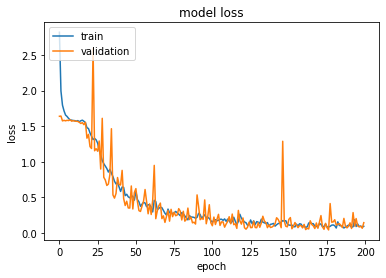

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate prediction accuracy using test images

In [0]:
predictions = model.predict_generator(test_batches, steps=steps, verbose=0)
test_predictions = predictions.argmax(axis=1)                                      #returns the index of the maximum value along an axis

In [0]:
print ("Accuracy score = ", accuracy_score(test_labels, test_predictions))

Accuracy score =  0.934


# Load saved checkpoint model and test

In [0]:
model = load_model(checkpoint_path)
x_test = test_images.astype('float32') / 255
y_test = one_hot_test_labels.astype('float32')
scores = model.evaluate(x_test, y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1000/1000 [==============================] - 3s 3ms/step
acc: 97.80%


# Load 10 test samples and verify prediction performance

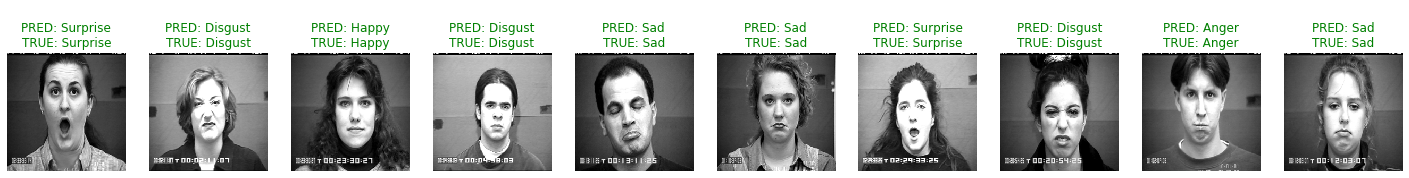


Predicted success: 10 / 10



In [0]:
data_gen = ImageDataGenerator(rescale= 1./255)
count=0
i=0
columns=10
IMG_SIZE = 224
text_labels=[]
true_labels=[]
x = np.array(test_images)
y = np.array(test_labels)
plt.figure(figsize=(25,25))


for batch in data_gen.flow(x,shuffle=False, batch_size=1):
  pred = model.predict(batch)
  #print(pred)
  maxValue = np.amax(pred)
  #print(maxValue)
  
  result = np.where(pred == np.amax(pred))
  listOfCordinates = list((result[1]))
  #print(listOfCordinates[0])
  
  for cord in listOfCordinates:
    #print(cord)
    #print(test_labels[i])
  
    if (cord == 0):
      text_labels.append('Happy')
    elif(cord == 1):
      text_labels.append('Sad')
    elif(cord == 2):
      text_labels.append('Surprise')
    elif(cord == 3):
      text_labels.append('Anger')
    elif(cord == 4):
      text_labels.append('Disgust')
    
    if (test_labels[i] == 0):
      true_labels.append('Happy')
    elif(test_labels[i] == 1):
      true_labels.append('Sad')
    elif(test_labels[i] == 2):
      true_labels.append('Surprise')
    elif(test_labels[i] == 3):
      true_labels.append('Anger')
    elif(test_labels[i] == 4):
      true_labels.append('Disgust')
    else:
      true_labels.append('Not Known')
    
  x = np.array(batch).reshape(-1, IMG_SIZE, IMG_SIZE)
  plt.subplot(5 / columns + 1, columns, i+1)
  
  if (text_labels[i] == true_labels[i]):
    font = {'color': 'green'}
    count += 1
  else:
    font = {'color': 'red'}
  plt.title('\nPRED: ' + text_labels[i] + '\n' + 'TRUE: ' + true_labels[i], fontdict=font)
  plt.axis('off')
  imgplot = plt.imshow(x[0], cmap='gray')
  i += 1
  if i % 10 == 0:
    break
plt.show()

print('\nPredicted success: ' + str(count) + ' / 10\n')

# Create Confusion Matrix

In [0]:
cm = confusion_matrix(test_labels, test_predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

    print(cm)
    
    thresh = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i,j],
              horizontalalignment="center",
              color="white" if cm[i,j] > thresh else "black")
      
    plt.ylim([4.5, -.5])
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
  
  

Confusion matrix, without normalization
[[199   0   0   0   1]
 [  0 194   0   1   5]
 [  1   3 191   0   5]
 [  0   1   0 151  48]
 [  1   0   0   0 199]]


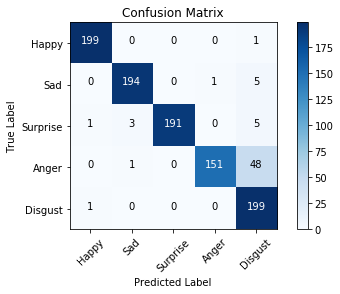

In [0]:
cm_plot_labels = ['Happy','Sad','Surprise','Anger','Disgust']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')